In [1]:
from numpy import *
from random import *
from pylab import *
from math import *

def trapecio(f,a,b,N):
    h=(b-a)/N
    s=0.5*(f(a)+f(b))
    for k in range(1,N):
        s+=f(a+k*h)
    return s*h

def simpson(f, a, b, n):
    h=(b-a)/n
    s=0.0
    x=a + h
    for i in range(1,n,2):
        s += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(2,n,2):
        s += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+s)

    
def inc0(f,a,b,N):
    h=(b-a)/N
    #s=0.5*f(a)+0.5*f(b)
    s=0
    for k in range(1,N//2+1):
        s+=f(a+(2*k-1)*h)
    return s*h

def Romberg(f,a,b,epsilon=1e-6):
    I = (b-a)/2*(f(b)+f(a)) #primer termino es trapecio R1,1
    eps=1
    N=1
    R =zeros((100,100)) 
    R[0,0]=I
    i=0
    while eps>epsilon:
        N*=2 #incremento por 2 el tamaño de pasos
        i+=1
        R[i,0] = R[i-1,0]/2 + inc0(f,a,b,N)
        for m in range(i):
            R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
            eps = abs(R[i,m+1]-R[i-1,m]) #error
    I= R[i,m+1]
    return I

def Hit_miss(f,x_i,x_f,y_i,y_f,N):
    A=abs(x_f-x_i)*abs(y_f-y_i)
    n_in = 0
    for i in range(1,N):
        x2 = uniform(x_i,x_f)
        y2 = uniform(y_i,y_f)
        if f(x2) > y2:
            n_in += 1
    area = ((n_in) / float(N))*A
    return area

def monte_carlo_crudo(f,minimo,maximo,muestras=5000):
    s = 0
    for i in range(muestras):
        x = uniform(minimo, maximo)
        s += f(x)
    
    return (maximo - minimo) * float(s/muestras)

## Errores Numéricos con Monte Carlo

In [2]:
from pylab import *
from numpy import *

Recordemos la definición de Variancia:
Variancia (que suele representarse como $\sigma ^{2}$) de una variable aleatoria es una medida de dispersión definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media.

Determinando la Variancia de nuestra estimación:
    
$$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2$$

La variancia nos da la idea de cuanto varia f(x) en el dominio de x. 

**Ejercicio, encontrar sigma para la integral $$\int_0^3 e^{-x^2}dx$$
para M=10, 20, 50 y 100.

In [3]:

f=lambda x: exp(-x**2)
f2=lambda x: exp(-x**2)**2

#Valor real de la integral 0.88620738
print('trapecio',trapecio(f,0,3,100))
print('simpson',simpson(f,0,3,100))
print('romberg',Romberg(f,0,3,1e-3))
print('montecarlo hit and miss',Hit_miss(f,0,3,0,1,100))
print('montecarlo Crudo',monte_carlo_crudo(f,0,3,100))
print('-----------------------------------')
print('Ahora haremos la comparación con varias N')
for i in [10,20,50,100,10000]:
    res=monte_carlo_crudo(f,0,3,i)
    var=abs(monte_carlo_crudo(f2,0,3,i)-monte_carlo_crudo(f,0,3,i)**2)
    print('Crudo: para %d el resultado es %f con variancia %f'%(i,res,var))
for i in [10,20,50,100,10000]:
    res=Hit_miss(f,0.,3.,0.,1.,i)
    var=abs(Hit_miss(f2,0.,3.,0.,1.,i)-Hit_miss(f,0.,3.,0,1,i)**2)
    print('Hit and Miss: para %d el resultado es %f con variancia %f'%(i,res,var))

trapecio 0.8862072927500889
simpson 0.8862073481597856
romberg 0.8861978101295614
montecarlo hit and miss 0.8999999999999999
montecarlo Crudo 1.0039957319477226
-----------------------------------
Ahora haremos la comparación con varias N
Crudo: para 10 el resultado es 1.006497 con variancia 0.273009
Crudo: para 20 el resultado es 0.920568 con variancia 0.267491
Crudo: para 50 el resultado es 1.061694 con variancia 0.056364
Crudo: para 100 el resultado es 0.782069 con variancia 0.172665
Crudo: para 10000 el resultado es 0.895780 con variancia 0.148344
Hit and Miss: para 10 el resultado es 1.200000 con variancia 0.540000
Hit and Miss: para 20 el resultado es 0.600000 con variancia 0.360000
Hit and Miss: para 50 el resultado es 0.780000 con variancia 0.075600
Hit and Miss: para 100 el resultado es 0.750000 con variancia 0.453900
Hit and Miss: para 10000 el resultado es 0.895500 con variancia 0.177016


## Variancia para Monte Carlo Crudo

   
$$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2$$

Supongamos que hacemos la medición de $I$ con distintas $N$ ($I_N$). De acuerdo al teorema del límite central, estos valores están distribuidos alrededor de $\langle I \rangle$ con una distribución normal. Entonces, la variancia la podemos definir como:

$$\sigma_m ^2=\langle I^2 \rangle - \langle I \rangle ^2$$

donde $\sigma_m$ es la desviación estandar del promedio:
$$\sigma_m =\frac{\sigma}{\sqrt{N}}$$ 

 Para Monte Carlo crudo

$$
\sigma^2=\left[\frac{b-a}{N}\sum_i^N f^2(x_i)\right]-\left[\sum_j^N \frac{b-a}{N}f(x_i)\right]^2
$$


Regresemos a la integral de $$\int_0^{\infty}\frac{e^{-x}}{1+(x-1)^2}dx$$

In [4]:
from random import *
from pylab import *
from math import *

def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)

def pot_f(x):
    return (f(x)*f(x))

def variancia_deMC(f,a,b,N=5000):
    n_in = 0
    #<I**2>
    for i in range(N):
        x = uniform(a, b)
        n_in += f(x)**2
    sum_of_sqs = n_in*(b-a) / N
    #<I>**2
    n_in = 0
    for i in range(N):
        x = uniform(a, b)
        n_in = f(x)
    sq_ave = ((b-a)*n_in/N)**2
    
    return sum_of_sqs - sq_ave

print('variancia',variancia_deMC(f,0,5,10000))
error=sqrt(variancia_deMC(f,0,5,10000))/sqrt(10000)
print('con un error estimado de =',error)

variancia 0.27591347937690935
con un error estimado de = 0.005196929850005255


¿Conviene estimar el error con el error porcentual o con el error estimado por la variancia?
Regresemos al problema de calcular $\pi$ dado que conocemos el valor real.

100.0 3.2087446418952466 0.06715198830545344
200.0 3.1368008212724825 0.004791832317310618
400.0 3.0994646481317645 0.04212800545802864
800.0 3.115132920216855 0.026459733372937944
1600.0 3.1283060469111694 0.013286606678623691
3200.0 3.1683436975863897 0.026751043996596557
6400.0 3.145286061071427 0.003693407481633937
12800.0 3.1314269749510966 0.010165678638696551
25600.0 3.13814277293209 0.0034498806577030194
51200.0 3.1368338211987936 0.004758832390999501
102400.0 3.140224379344139 0.0013682742456539998
204800.0 3.137009008359391 0.004583645230402222
409600.0 3.1435680921137332 0.0019754385239401095
819200.0 3.1425072122064166 0.0009145586166234843
1638400.0 3.141894217779782 0.0003015641899888344
3276800.0 3.1420405591648173 0.0004479055750241656


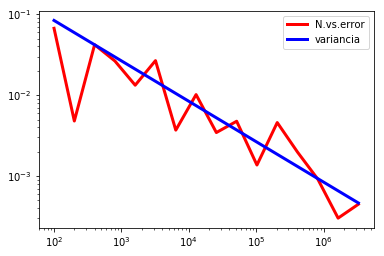

In [5]:
from random import random
from pylab import *
#Funcion que guarda todos los puntos aleatorios de un solo experimento.
def random_vectoria(n):
    r=[]
    for i in range(n):
        r.append(random())
    return r
total=16 #Veces que se repite el experimento
N=zeros(total) 
R=zeros(total) #Resultado de la integral
E=zeros(total)
n0=100 #numeros de tiros o puntos de la integral (iniciamos con 100)
for i in range(total): #i guarda el numero de veces que repito el experimento
    N[i]=n0
    r=random_vectoria(n0)
    R[i]=0.
    for j in range(n0): #aquí va MonteCarlo
        x=r[j]
        R[i]+=sqrt(1-x**2) #circulo unitario
    R[i]*=4./float(n0)
    n0*=2 #duplicamos el numero de tiros
    E[i] = abs(R[i]-pi) #Error absoluto
    print(N[i],R[i],E[i])
            
plot(N,E,ls='-',c='red',lw=3,label='N.vs.error')
plot(N,0.84/sqrt(N),ls='-',c='blue',lw=3,label='variancia')
xscale('log')
yscale('log')
legend()
show()

Hasta el momento, tenemos dos formas de mejorar la integral:
    1. Con muchos pasos
    2. Reduciendo la varianza (Importance sampling)

Una manera de reducir la variancia es muestrear las regiones donde se encuentra la integral, con mayores contribuciones de puntos (ya no tener una distribución uniforme de puntos aleatorios). Para esto, introducimos una distribución de probabilidad $P(x)$ normalizada en el intervalo de integración
$$\int _a^b{P(x)dx} = 1.$$ 
Entonces, se puede reescribir la integral de $f(x)$ como 
$$I=\int _a^b{\frac{f(x)}{P(x)}P(x)dx}$$ 
Podemos evaluar esta integral, mapeando el espacio con puntos aleatorios que obedecen la distribución de probabilidad dada $P(x)$ y evaluando la suma $$I(N)=\frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{P(x_i)}$$.

(Para el caso uniforme $P(x)=1/(b-a)$, la expresión se reduce a Monte Carlo crudo)

Truco: Para escoger $P(x)$, que minimice la variancia, podemos escoger una $P(x)$ que imite a $f(x)$, donde $f(x)$ es larga. Si se escoge apropiadamente $P(x)$, el integrando varia muy lentamente, y la variancia se reduce. 

### Visualicemos un problema concreto

Para la integral de $$I(x)=\int_0^{\infty}\frac{e^{-x}}{1+(x-1)^2}dx$$

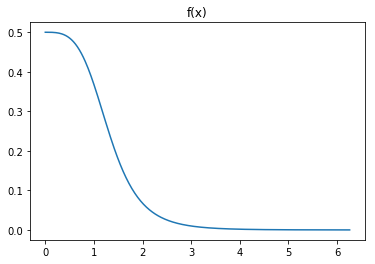

In [6]:
def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)
xs = [float(i/50) for i in range(int(50*pi*2))]
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

Proponemos la primera función de peso:
$$P=Ae^{-\lambda x}$$

Entonces, P(x) la escogimos así porque es la función que más se parece a la función a evaluar. Ahora, queda por determinar la $A$ y $\lambda$ optima que nos resuelva la función


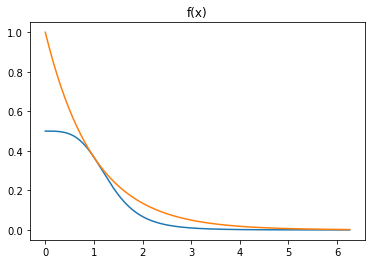

In [7]:
def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)

def f1(x):
    return 1*(e**(-1*x))
xs = [float(i/50) for i in range(int(50*pi*2))]
ys = [f(x) for x in xs]
ys1 = [f1(x) for x in xs]
plt.plot(xs,ys)
plt.plot(xs,ys1)
plt.title("f(x)");

La azúl es la función a aproximar, mientras que la naranja es nuestra función de peso. Nótese que para que la función de prueba se aproxime mejor es necesario tener $A$ y $\lambda$ óptimas.

La constante de normalización será encontrada de la forma tradicional de la mecánica cuántica. 
El resultado es $A=\lambda$

Para encontrar el caso óptimo y resolver la integral, cálculemos distintas $\lambda \in [0.05,3.0]$ y determinaremos la variancia que se genera. Luego, escogeremos la que tiene variancia mínima. La variancia será cálculada como:

$$
\sigma^2=\left[\frac{1}{N} \sum_i^N \frac{f^2(x_i)}{P^2(x_i)} \right] - \left[\frac{1}{N} \sum_i^N \frac{f^2(x_j)}{P^2(x_j)} \right]^2
$$

y aproximaremos la integral como:

$$
I\approx \frac{1}{N} \sum_i^N \frac{f(P^{-1}(r_i))}{g(P^{-1}(r_i))}
$$


In [9]:
def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2) 

def P(x, A, lamda):
    e = 2.71828
    return A*pow(e, -1*lamda*x)

def P_1(r, lamda):
    return (-1 * log(float(r)))/lamda


def varianza_min(lamda, N):
    A = lamda
    int_max = 5
    total = 0
    for i in range(N):
        x = uniform(0, int_max)
        total += (f(x)/P(x, A, lamda))**2
    sum_of_sqs = total / N
    
    total = 0
    for i in range(N):
        x = uniform(0, int_max)
        total += f(x)/P(x, A, lamda)
    sq_ave = (total/N)**2
    return sum_of_sqs - sq_ave

def importance_sampling_MC(lamda, N):
    A = lamda  
    total = 0
    for i in range(N):
        r = uniform(0,1)
        total += f(P_1(r, lamda))/P(P_1(r, lamda), A, lamda)
    approximation = float(total/N)
    return approximation

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas): #funcion que va enumerando una lista mientras la recorre
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(varianza_min(lamda, 10000))
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))] #aqui encuentro el menor elemento de todas las varianza

print(f"Lambda Optimal: {optimal_lamda}")
print(f" VarianciaOptimal: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

N = 10000
approx = importance_sampling_MC(optimal_lamda,N)
variance = varianza_min(optimal_lamda, N)
error = (variance/N)**0.5

print('Calculando la integral con la lambda mejor')
print(f"Integral con Importance Sampling: {approx}")
print(f"Variancia: {variance}")
print(f"Error: {error}")

lambda 1/60: 0.05
lambda 2/60: 0.1
lambda 3/60: 0.15000000000000002
lambda 4/60: 0.2
lambda 5/60: 0.25
lambda 6/60: 0.30000000000000004
lambda 7/60: 0.35000000000000003
lambda 8/60: 0.4
lambda 9/60: 0.45
lambda 10/60: 0.5
lambda 11/60: 0.55
lambda 12/60: 0.6000000000000001
lambda 13/60: 0.65
lambda 14/60: 0.7000000000000001
lambda 15/60: 0.75
lambda 16/60: 0.8
lambda 17/60: 0.8500000000000001
lambda 18/60: 0.9
lambda 19/60: 0.9500000000000001
lambda 20/60: 1.0
lambda 21/60: 1.05
lambda 22/60: 1.1
lambda 23/60: 1.1500000000000001
lambda 24/60: 1.2000000000000002
lambda 25/60: 1.25
lambda 26/60: 1.3
lambda 27/60: 1.35
lambda 28/60: 1.4000000000000001
lambda 29/60: 1.4500000000000002
lambda 30/60: 1.5
lambda 31/60: 1.55
lambda 32/60: 1.6
lambda 33/60: 1.6500000000000001
lambda 34/60: 1.7000000000000002
lambda 35/60: 1.75
lambda 36/60: 1.8
lambda 37/60: 1.85
lambda 38/60: 1.9000000000000001
lambda 39/60: 1.9500000000000002
lambda 40/60: 2.0
lambda 41/60: 2.0500000000000003
lambda 42/60: 2.

Ejemplo:
Sea $$I=\int _0^1 {e^{-x^2}dx}.$$ 
Una función de peso razonable es $P(x)=Ae^{-x}$, donde $A$ es la constante de normalización.

Ejercicio 1:

Sea$P(x)=e^{-x}$, evaluar la integral
: $$\int _0^{\infty} {x^{3/2}e^{-x}dx}.$$

Ejercicio 2:

Escoge $P(x)=e^{-ax}$ y estima la integral $$\int _0^{\pi} \frac{dx}{x^2+\cos ^2{x}}.$$ Determina $a$ que minimice la variancia de la integral.

## Una breve introducción a Metropolis

In [10]:
def metropolis(func, steps=10000):
    muestras = np.zeros(steps)
    old_x = func.mean() #media en el intervalo 0 a 1
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)#eta de debt. 
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x #muestreo de las x
    
    return muestras

C:\ProgramData\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


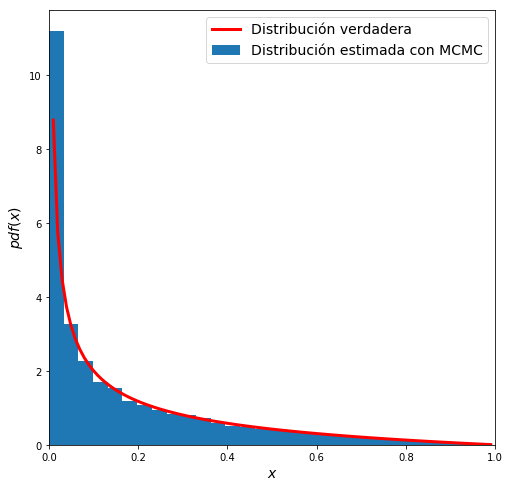

In [11]:
# distribución beta
from scipy.stats import beta
func = beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, normed=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

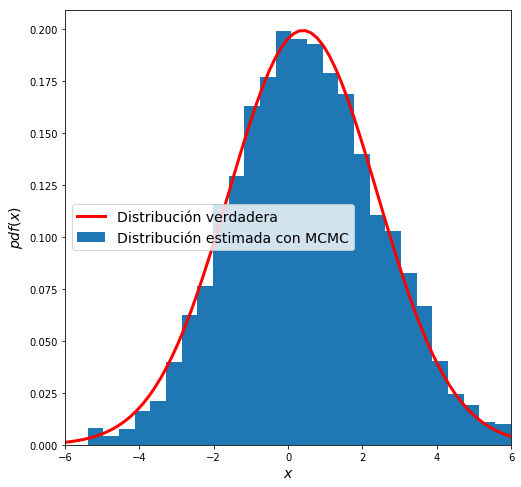

In [12]:
from scipy.stats import norm
func = norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, normed=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()